### Breast Cancer Prediciton Model, using K-Nearest Neighbor Classifier.

In this project, we used several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.

This project is part of the Codecademy Data Science Career Path 


In [19]:
#importing the breast cancer data from sklearn.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [20]:
#Load data into a variable
breast_cancer_data = load_breast_cancer()

In [21]:
#take a look at the data
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)


[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [22]:
#what are we trying to classify, so we have bunch of attributes we can access, we have target and target names. each target is a classification label, target names are categories we will be working with, so each of this number, the first data point is tagged as malignant
#breast_cancer_data.target gives you the labels of every data point.
#By looking at the target_names, we know that 0 corresponds to malignant.

print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Split Data into Training and Validation Set 

In [23]:
#split the data into Training and Validation Sets using train_test_split 

print(train_test_split(
  breast_cancer_data.data,
  breast_cancer_data.target,
  test_size = 0.2,
  random_state=100 
))

training_data, validation_data, training_labels, validation_labels = train_test_split(
  breast_cancer_data.data,
  breast_cancer_data.target,
  test_size = 0.2,
  random_state=100)


[array([[1.305e+01, 1.931e+01, 8.261e+01, ..., 1.111e-02, 2.439e-01,
        6.289e-02],
       [1.288e+01, 2.892e+01, 8.250e+01, ..., 6.493e-02, 2.372e-01,
        7.242e-02],
       [1.575e+01, 1.922e+01, 1.071e+02, ..., 2.135e-01, 4.245e-01,
        1.050e-01],
       ...,
       [1.166e+01, 1.707e+01, 7.370e+01, ..., 4.262e-02, 2.731e-01,
        6.825e-02],
       [1.286e+01, 1.800e+01, 8.319e+01, ..., 7.926e-02, 2.779e-01,
        7.918e-02],
       [9.295e+00, 1.390e+01, 5.996e+01, ..., 7.262e-02, 3.681e-01,
        8.982e-02]]), array([[1.791e+01, 2.102e+01, 1.244e+02, ..., 1.964e-01, 3.245e-01,
        1.198e-01],
       [1.434e+01, 1.347e+01, 9.251e+01, ..., 1.087e-01, 3.062e-01,
        6.072e-02],
       [2.016e+01, 1.966e+01, 1.311e+02, ..., 1.425e-01, 3.055e-01,
        5.933e-02],
       ...,
       [1.303e+01, 1.842e+01, 8.261e+01, ..., 5.013e-02, 1.987e-01,
        6.169e-02],
       [1.825e+01, 1.998e+01, 1.196e+02, ..., 1.932e-01, 3.063e-01,
        8.368e-02],
     

In [24]:

#7 Let’s confirm that worked correctly. Print out the length of training_data and training_labels. They should be the same size - one label for every piece of data!

print(len(training_data))
print(len(training_labels))

455
455


### Create Classifier 

In [25]:
#Now that we’ve created training and validation sets, we can create a KNeighborsClassifier and test its accuracy.
#We will heck how accuracy change for different k values, make loop and reassign k as it iterates over the loop)
accuracies = []
for k in range (1,101):
  classifier = KNeighborsClassifier(n_neighbors=k) 
  classifier.fit(training_data, training_labels)
  accuracies.append(classifier.score(validation_data, validation_labels))
  

### Check what K value gives best accuracy

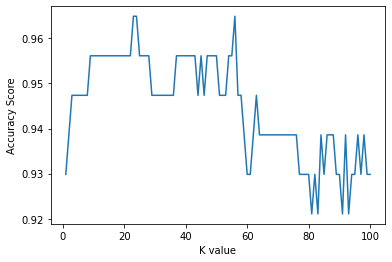

In [26]:
#visualize the score result for K in range (1-101), so it easier to see what K gives best accuracy. for this we will import matplotlib, y axis -accuracy, x is k values 

k_list = range(1,101)

#x variable = k_list 
#y variable= accuracies 



plt.plot(k_list, accuracies)
plt.xlabel('K value')
plt.ylabel('Accuracy Score')
plt.show()